In [44]:
import numpy as np
import scanpy as sc
import anndata
import scvi
from scib_metrics.benchmark import Benchmarker
import torch
import scib_metrics
from lightning.pytorch.callbacks import ModelCheckpoint
import copy
%matplotlib inline
import sys
sys.path.append('..')
from functions import *
from SCVIModelCheckpoint import SCVIModelCheckpoint 

In [45]:
adata = anndata.read_h5ad(filename="../data/adataLung4.h5ad")

In [46]:
def umapVisualization(model, adata, save="test", use_pca=False):
    warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
    adatac = adata.copy()
    adatac.obsm["X_scVI"] = model.get_latent_representation()
    sc.pp.neighbors(adatac, n_pcs=30)
    sc.tl.leiden(adatac, key_added="leiden",resolution=0.3)
    sc.pp.neighbors(adatac, use_rep="X_scVI")
    sc.tl.umap(adatac, min_dist=0.3)
    sc.pl.umap(
        adatac,
        color=["cell_type","batch","leiden"],
        frameon=False,
        save=save+".png",
        legend_loc=None,
    )

In [47]:
def plotUMAPEpochs(prior, epochs, adata):
    for ep in epochs:
        vae = scvi.model.SCVI.load(f"models/Final_MetEp_{prior}/epoch={ep}/",adata=adata)
        umapVisualization(vae, adata,save=f"{prior}_{ep}")

In [48]:
epochs = [9, 19, 199, 399]

INFO     File models/Final_MetEp_SD/epoch=9/model.pt already downloaded                                            


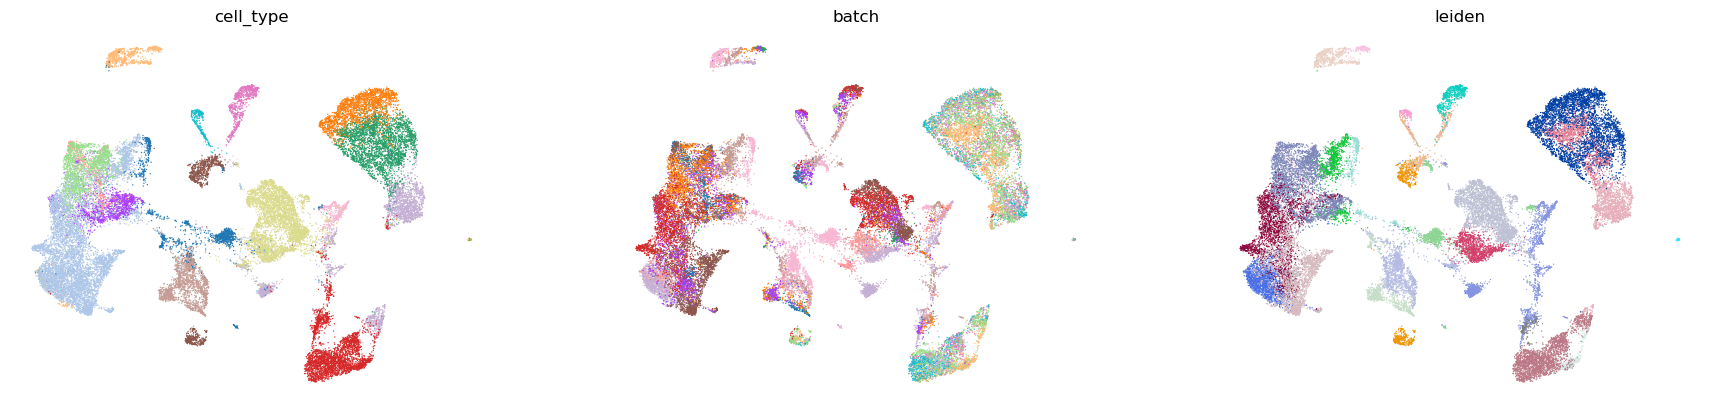

INFO     File models/Final_MetEp_SD/epoch=19/model.pt already downloaded                                           


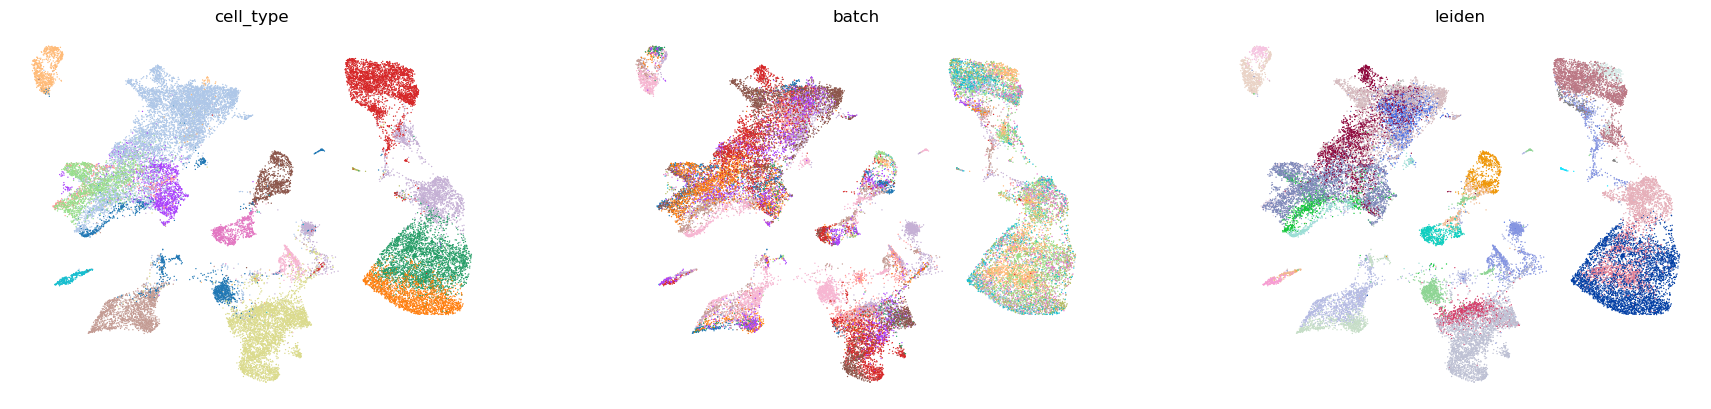

INFO     File models/Final_MetEp_SD/epoch=199/model.pt already downloaded                                          


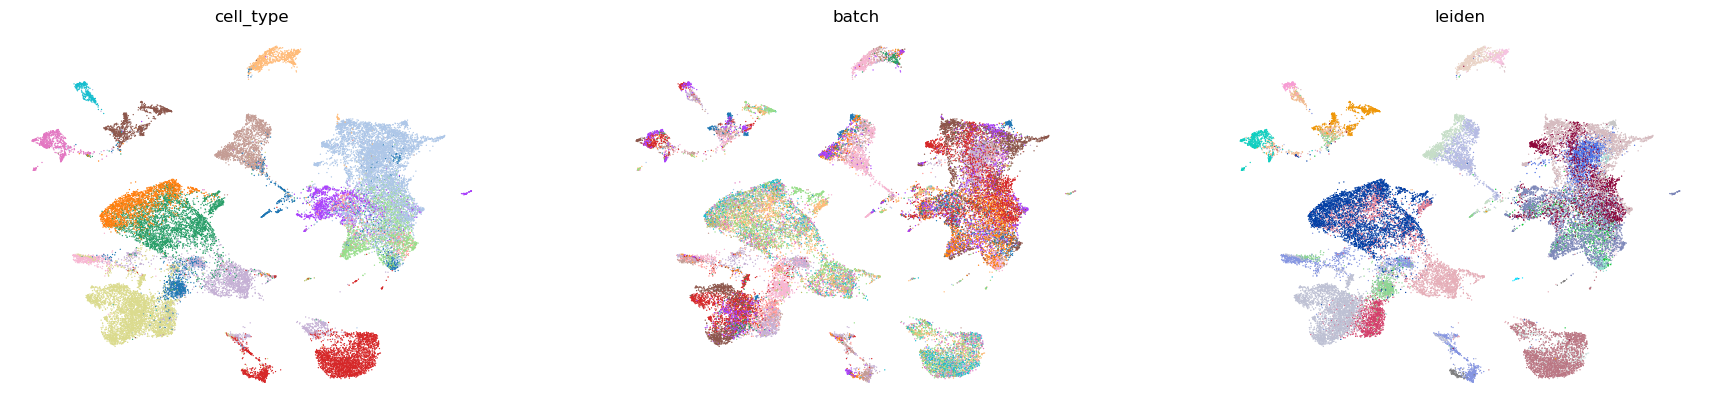

INFO     File models/Final_MetEp_SD/epoch=399/model.pt already downloaded                                          


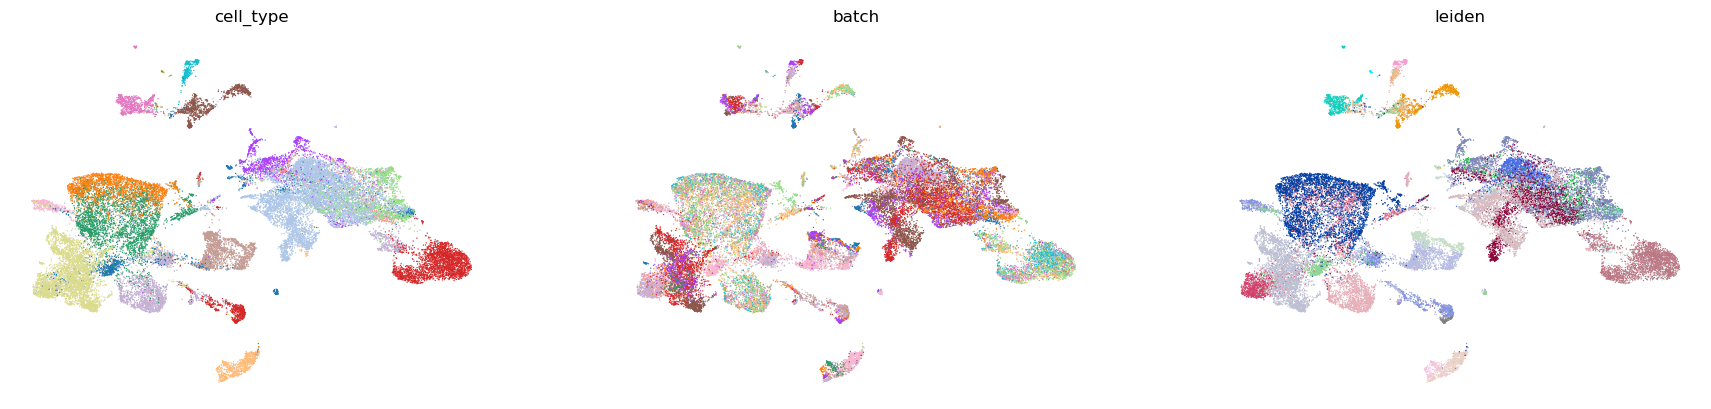

In [49]:
plotUMAPEpochs("SD",epochs, adata)

INFO     File models/Final_MetEp_MG/epoch=9/model.pt already downloaded                                            


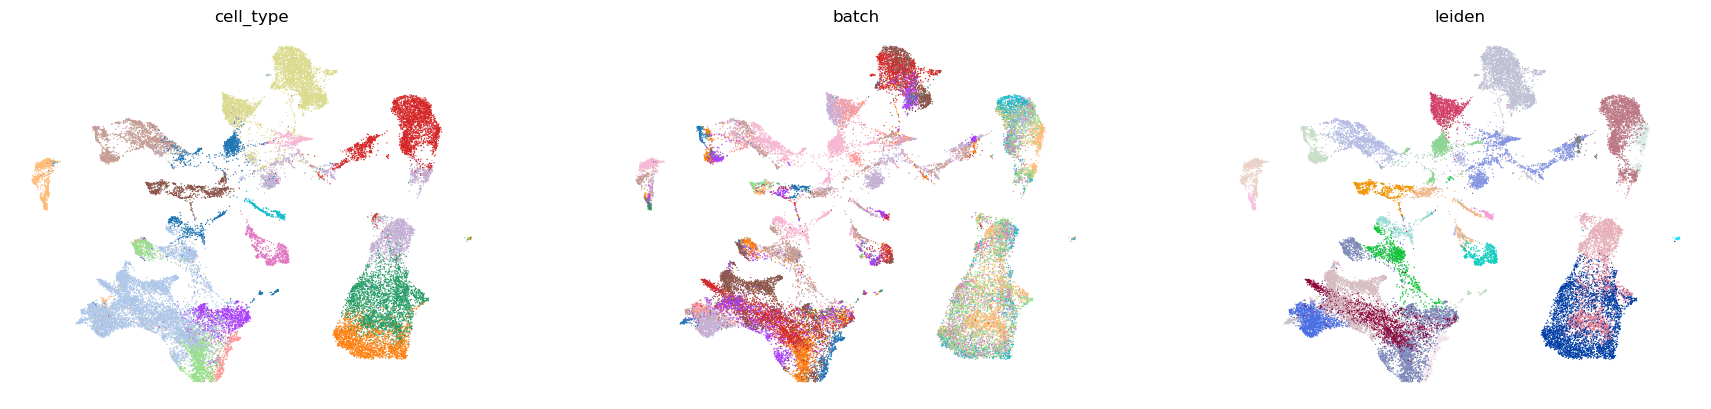

INFO     File models/Final_MetEp_MG/epoch=19/model.pt already downloaded                                           


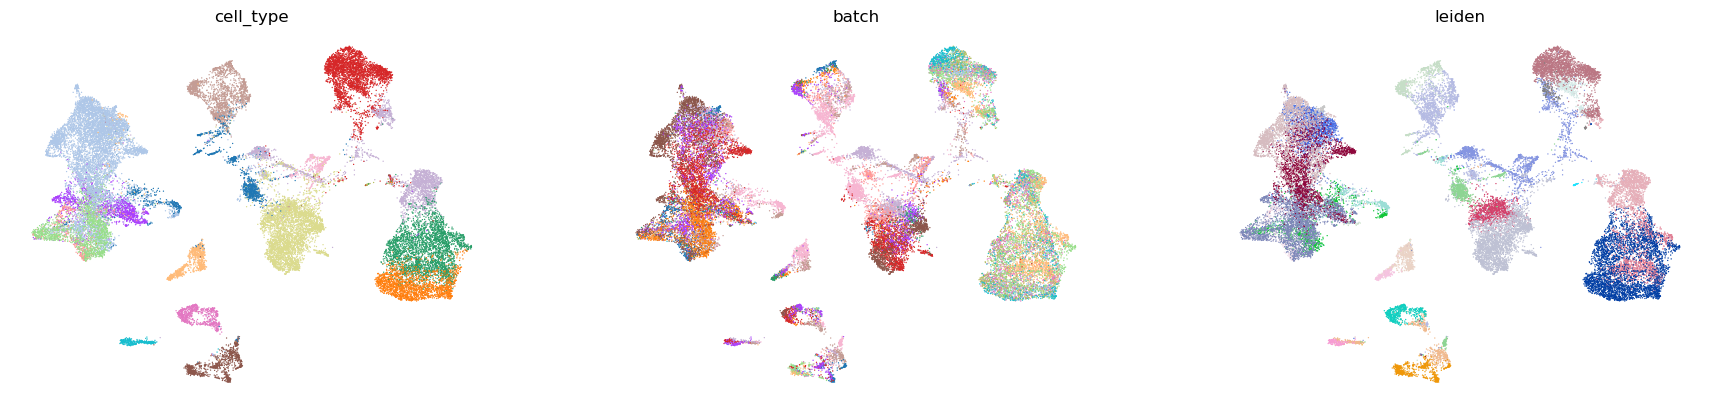

INFO     File models/Final_MetEp_MG/epoch=199/model.pt already downloaded                                          


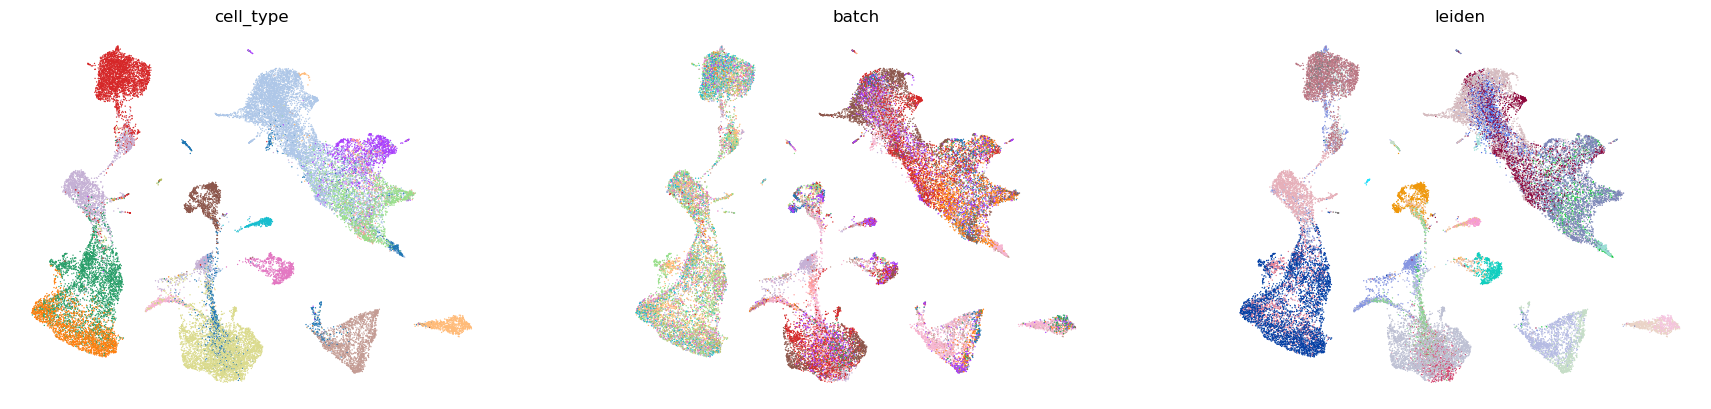

INFO     File models/Final_MetEp_MG/epoch=399/model.pt already downloaded                                          


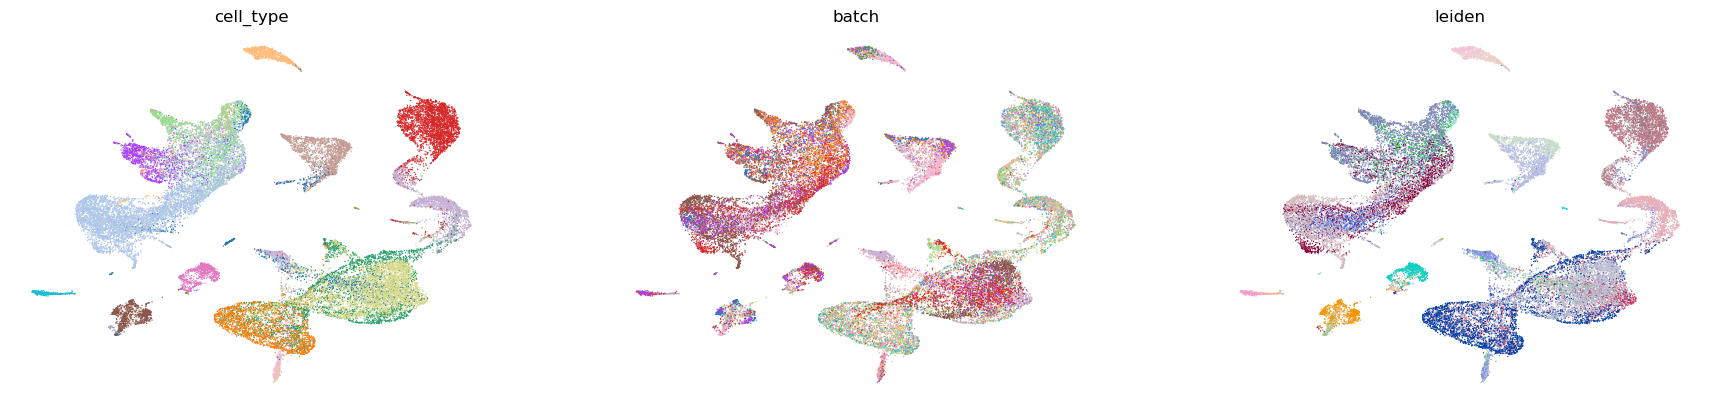

In [50]:
plotUMAPEpochs("MG",epochs, adata)

INFO     File models/Final_MetEp_VP/epoch=9/model.pt already downloaded                                            


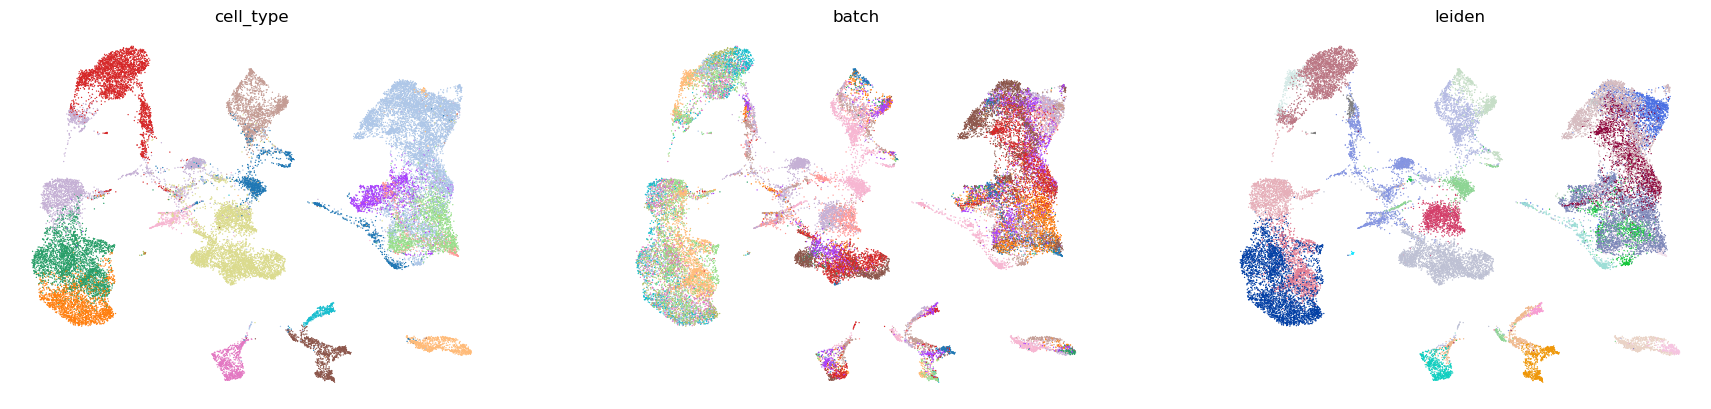

INFO     File models/Final_MetEp_VP/epoch=19/model.pt already downloaded                                           


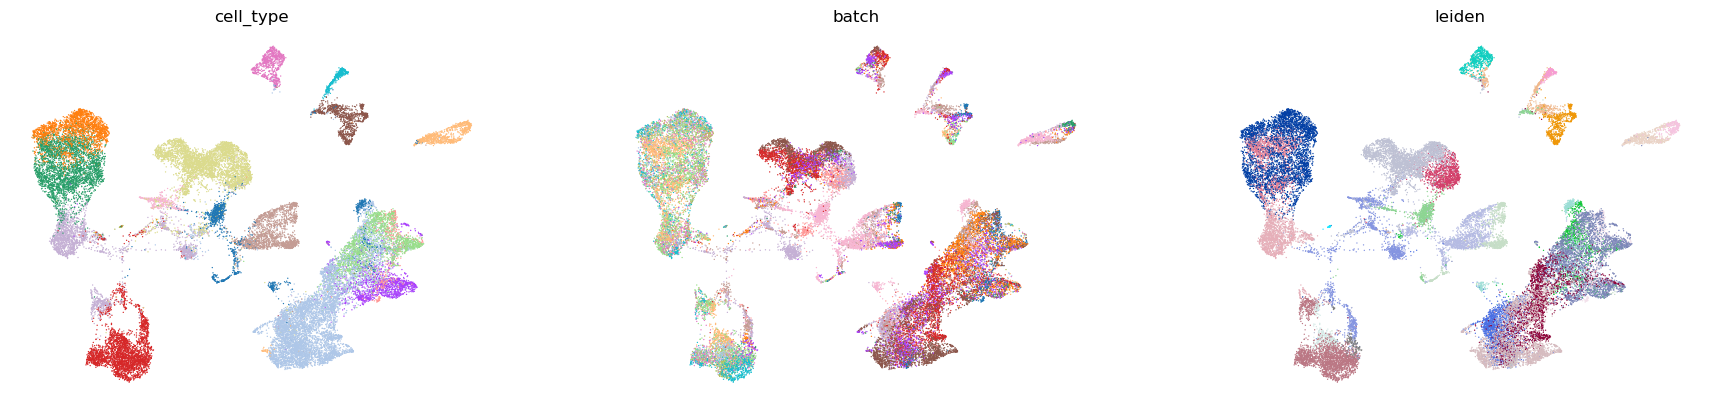

INFO     File models/Final_MetEp_VP/epoch=199/model.pt already downloaded                                          


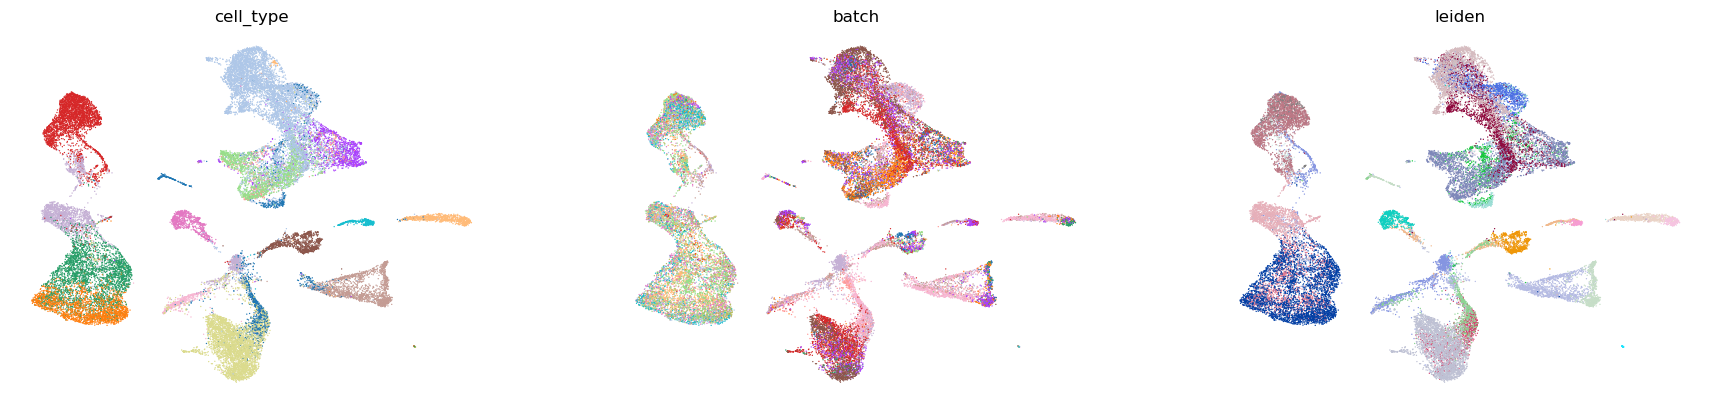

INFO     File models/Final_MetEp_VP/epoch=399/model.pt already downloaded                                          


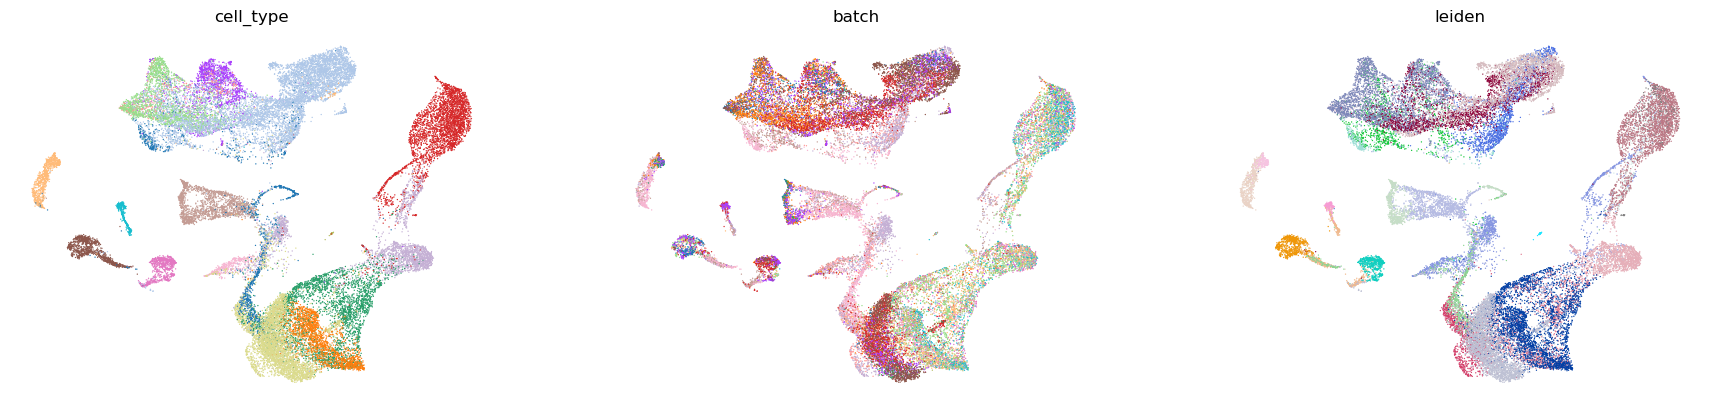

In [51]:
plotUMAPEpochs("VP",epochs, adata)

INFO     File models/Final_MetEp_NF/epoch=9/model.pt already downloaded                                            


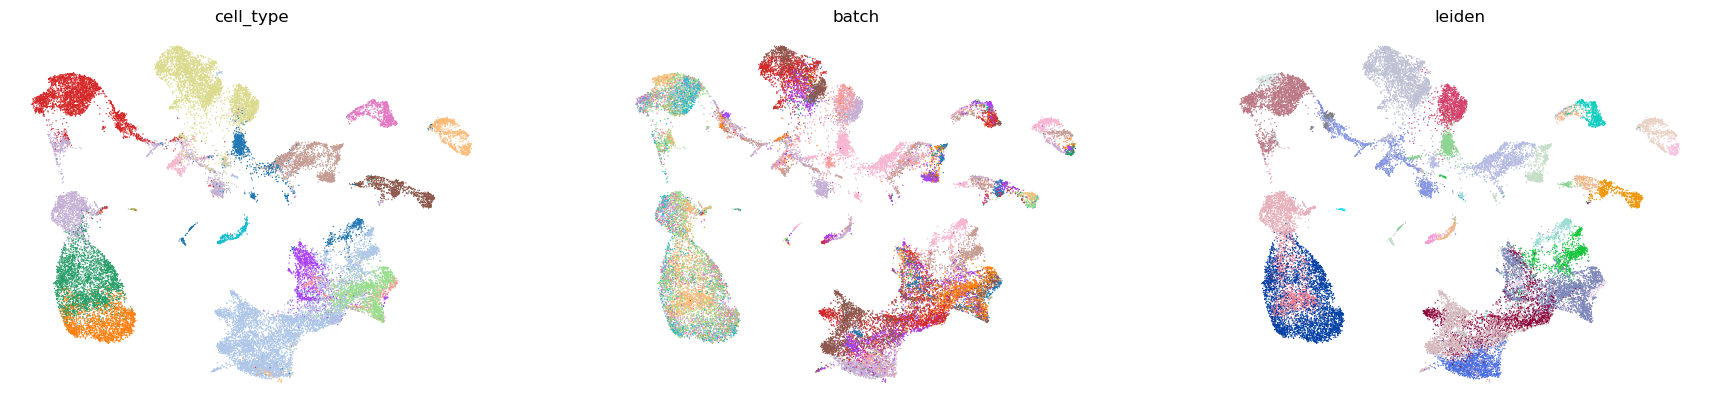

INFO     File models/Final_MetEp_NF/epoch=19/model.pt already downloaded                                           


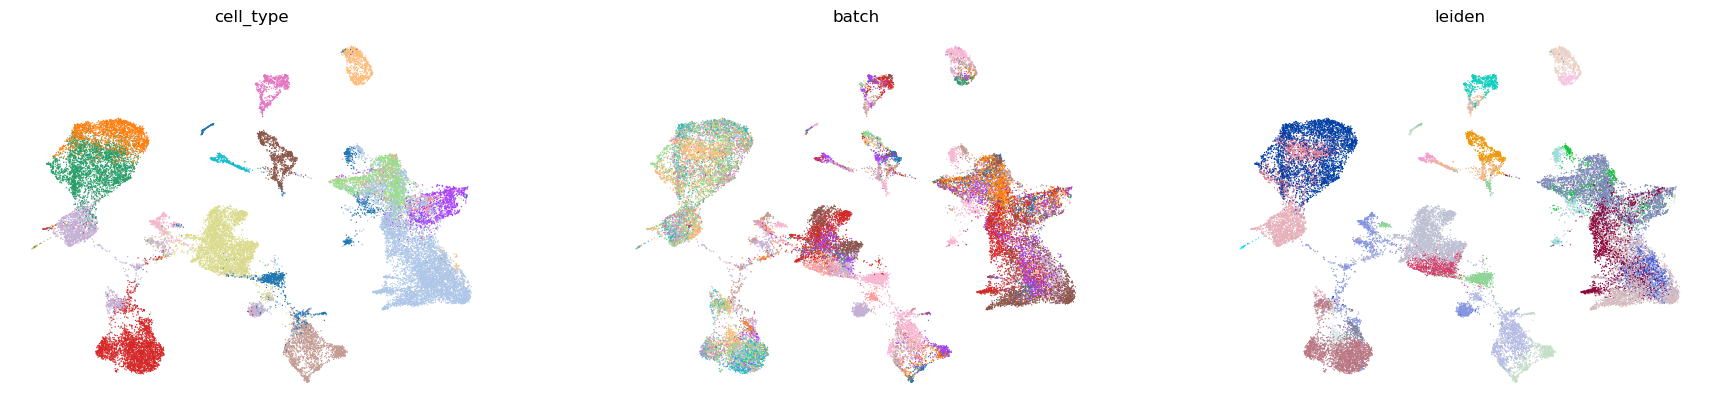

INFO     File models/Final_MetEp_NF/epoch=199/model.pt already downloaded                                          


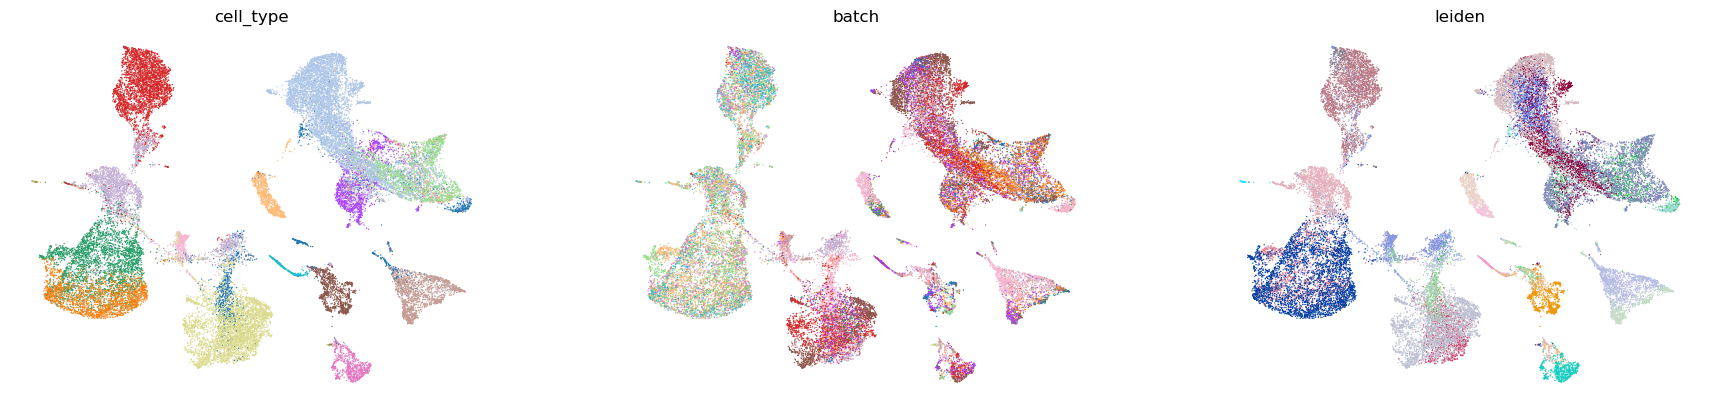

INFO     File models/Final_MetEp_NF/epoch=399/model.pt already downloaded                                          


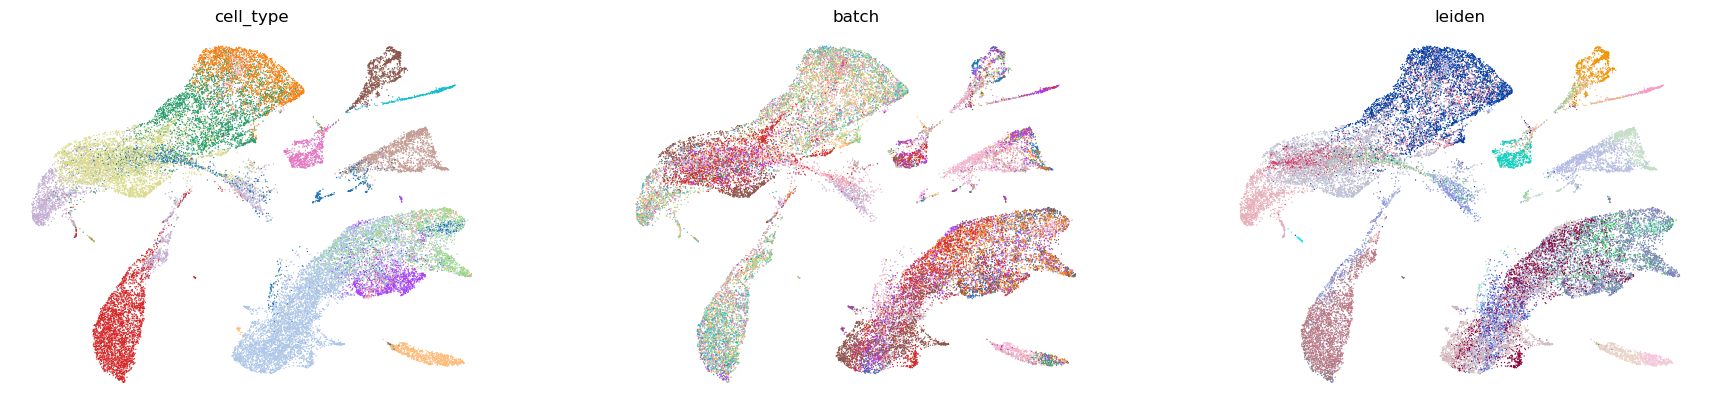

In [52]:
plotUMAPEpochs("NF",epochs, adata)